In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

- Chargement du Dataset

In [53]:
df = pd.read_csv('tested.csv')

- Affichage des 5 Prémiere ligne du Dataset

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Taille de Dataset

In [55]:
df.shape

(418, 12)

- Liste des Colonne du Data set

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Suppression des variable unitile pour notre étude

In [57]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

In [58]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0


- Desceiption des données avec la fonction describe

In [59]:
df.describe()

,Survived,Pclass,Age
count,418.000000,418.000000,332.000000
mean,0.363636,2.265550,30.272590
std,0.481622,0.841838,14.181209
min,0.000000,1.000000,0.170000
25%,0.000000,1.000000,21.000000
50%,0.000000,3.000000,27.000000
75%,1.000000,3.000000,39.000000
max,1.000000,3.000000,76.000000


- Gestion des données manquante

In [60]:
#df = df.fillna(df['Age'].mean) Remplancement des nan par la moyenne
df = df.dropna(axis=0)  # Suppression de la ligne contenant des valeurs manquante

- Calcule du nombre du nombre d'individu dans chaque classe

In [61]:
df['Pclass'].value_counts()

3    146
1     98
2     88
Name: Pclass, dtype: int64

- Visualisation graphique de la repartion des individus dans le class

<AxesSubplot:>

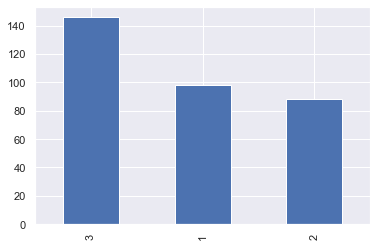

In [62]:
df['Pclass'].value_counts().plot.bar()

<AxesSubplot:>

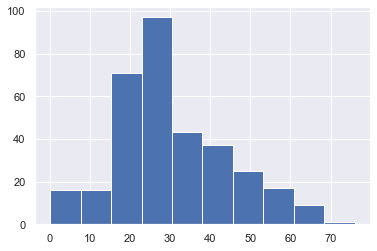

In [63]:
df['Age'].hist()

In [64]:
df.groupby(['Sex']).mean()

,Survived,Pclass,Age
Sex,,,
female,1.0,2.015748,30.272362
male,0.0,2.224390,30.272732


In [65]:
df['Survived'].value_counts()

0    205
1    127
Name: Survived, dtype: int64

- Encodage de la variable catégorielle Sex

In [66]:
#df['Sex'].map({'female':0,'male':1})
df['Sex'].replace(['male','female'],[0,1], inplace=True)
#df.loc[:,'Sex'] = df['Sex'].astype('category').cat.codes

In [67]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,34.5
1,1,3,1,47.0
2,0,2,0,62.0
3,0,3,0,27.0
4,1,3,1,22.0


- Importation de la Librairie Skealearn pour le ML

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
model = KNeighborsClassifier(n_neighbors=5)

- Création des variables X et y pour l'entrainement du modèle

In [91]:
X = df.drop('Survived', axis=1)
y = df['Survived']

 - Entrainement du modèle

In [92]:
model.fit(X,y)

KNeighborsClassifier()

 - Affichage du Score du modèle

In [93]:
score = model.score(X,y)
score

0.9337349397590361

- Creation d'une fonction de determination de Survie au Naufrage

In [94]:
def survie(model, pclass = 1, sex = 1, age = 50):
    X = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(X))
    print(model.predict_proba(X))

In [95]:
survie(model)

[0]
[[0.6 0.4]]


## Chargement du Dataset Iris Contenu dans Sklearn

In [96]:
from sklearn.datasets import load_iris

In [97]:
iris = load_iris()

X = iris.data
y = iris.target

In [98]:
X.shape

(150, 4)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


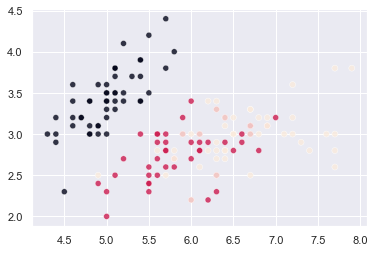

In [102]:
sns.scatterplot(X[:,0],X[:,1],data=X, c=y, alpha=0.8)
plt.show()

- Division du Data en Trainset et Testset

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


- Entrainement du model

In [120]:
model_1 = KNeighborsClassifier(n_neighbors=6)

In [121]:
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [124]:
print(f"Train_score : {model_1.score(X_train, y_train)}")
print(f"Test_score : {model_1.score(X_test,y_test)}")

Train_score : 0.9833333333333333
Test_score : 0.9666666666666667


 - Validation Croisée

In [153]:
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve

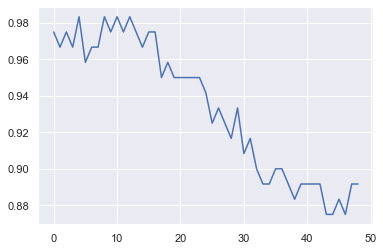

In [152]:
score_val = []
for i in range(1,50):
    score = cross_val_score(KNeighborsClassifier(i),X_train,y_train, cv=5, scoring='accuracy').mean()
    score_val.append(score)

plt.plot(score_val)
plt.show()

- Recherche de l'hyperparamètre avec la fonction curve de Sklearn

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


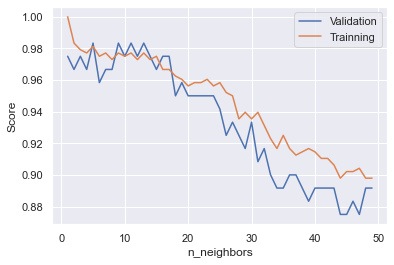

In [138]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(model, X_train, y_train,'n_neighbors',k ,cv = 5)
plt.plot(k,val_score.mean(axis=1), label = "Validation")
plt.plot(k,train_score.mean(axis=1), label = "Trainning")
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.show()

- Utilisation de GridsearchCV

In [141]:
params = {'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),params,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [142]:
grid.best_score_

0.9833333333333334

In [143]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [144]:
best_model = grid.best_estimator_

In [145]:
best_model.score(X_test,y_test)


0.9333333333333333

In [147]:
from sklearn.metrics import confusion_matrix

In [150]:
matrix = confusion_matrix(y_test, model_1.predict(X_test))

<AxesSubplot:>

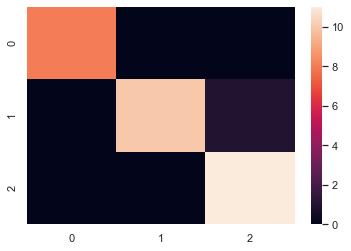

In [151]:
sns.heatmap(data=matrix)

- Learning Curve

[ 9 19 28 38 48 57 67 76 86 96]


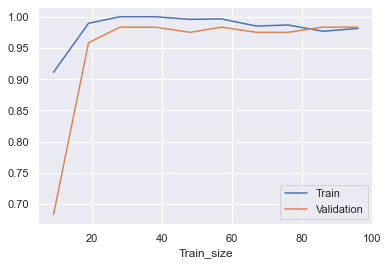

In [158]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'Train')
plt.plot(N, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()